In [29]:
import pandas as pd


In [30]:
#read in the unemployment data,,,2012 and 2018 data file have same file formats
df_unemployment = pd.read_csv('2012UnemploymentData.csv')
#add a column
df_unemployment['AvgAge'] = df_unemployment['UnemploymentRate']
df_unemployment['AgeIndex'] = df_unemployment['UnemploymentRate']

#df_unemployment.describe()

In [31]:
#read in enterprise data
df_enterprise = pd.read_csv('EnterpriseData.csv')


#add enterprise data to unemployment dataframe
df_unemployment['Enterprises'] = df_enterprise['NoOfEnterprises']
df_unemployment['totalPopulation'] = df_enterprise['totalPopulation']
#df_unemployment.info()


In [32]:
#df_unemployment.head(51)

In [33]:
#read population data,,,2012 and 2018 data file have same file formats
df_population = pd.read_csv('2012PopulationData.csv')
#df_population.describe()

In [34]:
df_popweight = df_population.copy()
#change data types of all columns
df_popweight[1:].astype('float64').dtypes
#df_popweight.info()

Age                     float64
Alabama                 float64
Alaska                  float64
Arizona                 float64
Arkansas                float64
California              float64
Colorado                float64
Connecticut             float64
Delaware                float64
District of Columbia    float64
Florida                 float64
Georgia                 float64
Hawaii                  float64
Idaho                   float64
Illinois                float64
Indiana                 float64
Iowa                    float64
Kansas                  float64
Kentucky                float64
Louisiana               float64
Maine                   float64
Maryland                float64
Massachusetts           float64
Michigan                float64
Minnesota               float64
Mississippi             float64
Missouri                float64
Montana                 float64
Nebraska                float64
Nevada                  float64
New Hampshire           float64
New Jers

In [35]:
#print(df_popweight[:3])

In [36]:
#get weighted avg age for each state avg = Sum(age level population*age level population)/total population

for col in range(1,len(df_popweight.columns)):
    AvgAge = 0.0
    totpop = float(df_popweight.iloc[0,col])
    for row in range(1,df_popweight.shape[0]):
        AvgAge += df_popweight.iloc[row,col] * row
    #print(AvgAge, "     ", totpop, "    ", col, "     ", df_unemployment.iloc[col-1,2])
    df_unemployment.iloc[col-1,2] = AvgAge / totpop
     
#df_unemployment.head(2)


In [37]:
#get ageIndex for each state ageIndex = 100 * Sum(population age levels 0-14)/Sum(population age levels 65+)
 
for col in range(1,len(df_popweight.columns)):
    P65 = 0.0
    P14 = 0.0
    ageIndex = 0.0
    #calc Population of ages 0-14
    for row in range(1,16):
        P14 += df_popweight.iloc[row,col] 
    #calc Population of ages 65+
    for row in range(66,df_popweight.shape[0]):
        P65 += df_popweight.iloc[row,col] 
    
    #print(P65, "     ", P14, "    ", col, "     ", df_unemployment.iloc[col-1,3])
    df_unemployment.iloc[col-1,3] = P65 * 100 / P14
     
#df_unemployment.head(2)

In [38]:
#import scikit to do regression
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [85]:
#prepare for ML: lable, independent variables
#if using single variable  then reshape the array...comment out reshape if using multivariable input
#run the model with one AvgAge or AgeIndex at a time 
#X = df_unemployment['AvgAge'].values.reshape(-1,1)
#X = df_unemployment['AgeIndex'].values.reshape(-1,1)
#y = df_unemployment['UnemploymentRate'].values.reshape(-1,1)
#run the model with one AvgAge or AgeIndex at a time 
#X = df_unemployment[['AvgAge','Enterprises','totalPopulation']].values
#X = df_unemployment[['AgeIndex','Enterprises','totalPopulation']].values

In [46]:
#run the whole analysis with log of data
import numpy as np
#log the data
#if using single variable  then reshape the array...comment out reshape if using multivariable input
df_unemployment['log_AvgAge'] = np.log(df_unemployment.AvgAge)
df_unemployment['log_AgeIndex'] = np.log(df_unemployment.AgeIndex)
df_unemployment['log_Enterprises'] = np.log(df_unemployment.Enterprises)
df_unemployment['log_totalPopulation'] = np.log(df_unemployment.totalPopulation)
df_unemployment['log_UnemploymentRate'] = np.log(df_unemployment.UnemploymentRate)

#prepare for ML: lable, independent variables
#X = df_unemployment['log_AvgAge'].values.reshape(-1,1)
#X = df_unemployment['log_AgeIndex'].values.reshape(-1,1)
y = df_unemployment['log_UnemploymentRate'].values.reshape(-1,1)
#run the model with one AvgAge or AgeIndex at a time 
#X = df_unemployment[['log_AvgAge','log_Enterprises','log_totalPopulation']].values
X = df_unemployment[['log_AgeIndex','log_Enterprises','log_totalPopulation']].values

Using two methods (linerregression model from sklearn lib and Statsmodel lib OLS) to calc. Regression Coeff. and Constant...just to double check. The results match.

In [87]:
#train the model
regressor = LinearRegression() 
regressor.fit(X, y) #training the algorithm
#print regression results
#To retrieve the intercept:
print('Reg. Intercept/Constant:  ', regressor.intercept_)

#For retrieving the slope:
print('Reg Coeff:  ', regressor.coef_)
#print r2
print('R2:  ' , regressor.score(X, y))


#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#root mean squared error is 0.71 which is 10% more than avg unemployment rate for all states (3.82), 
#So, the algorithm can not predict very well.

Reg. Intercept/Constant:   [4.47522321]
Reg Coeff:   [[-0.00723264]]
R2:   0.0228837739903609


In [47]:
#calc F-statistic and t-statistic...use the statsmodel to get all the model output including stats

import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     7.578
Date:                Wed, 04 Dec 2019   Prob (F-statistic):           0.000311
Time:                        11:19:16   Log-Likelihood:                 7.5027
No. Observations:                  51   AIC:                            -7.005
Df Residuals:                      47   BIC:                            0.7219
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3812      1.149     -2.072      0.044      -4.694      -0.069
x1             0.2124      0.156      1.363      0.179      -0.101       0.526
x2            -0.6296      0.260     -2.417      0.020      -1.154      -0.106
x3             0.6978      0.240      2.903      0.006       0.214       1.181
==============================================================================
Omnibus:                        0.731   Durbin-Watson:                   2.284
Prob(Omnibus):                  0.694   Jarque-Bera (JB):                0.183
Skew:                          -0.037   Prob(JB):                        0.913
Kurtosis:                       3.284   Cond. No.                         757.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

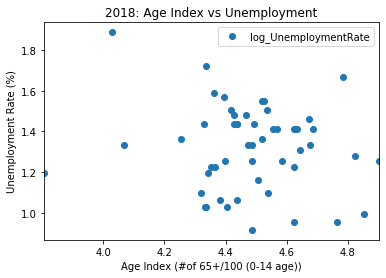

In [89]:
#plot Age Index vs. Unemployment ,,,change the year in title depending on data file
df_unemployment.plot(x='log_AgeIndex', y='log_UnemploymentRate', style='o')
#plt.yscale('log')
#plt.xscale('log')
plt.title('2018: Age Index vs Unemployment')  
plt.xlabel('Age Index (#of 65+/100 (0-14 age))')  
plt.ylabel('Unemployment Rate (%)')  
plt.savefig('2018AgeIndex')  #.show()

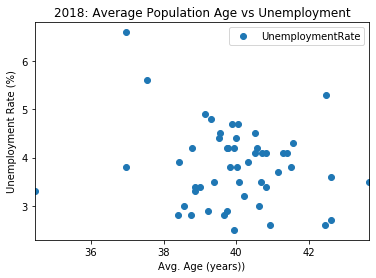

In [90]:
#plot Age Index vs. Unemployment ,,,change the year in title depending on data file
df_unemployment.plot(x='AvgAge', y='UnemploymentRate', style='o')  
plt.title('2018: Average Population Age vs Unemployment')  
plt.xlabel('Avg. Age (years))')  
plt.ylabel('Unemployment Rate (%)')  
plt.savefig('2018AvgAge')  #.show()